<a href="https://colab.research.google.com/github/mihir0804/DataScience/blob/main/Case_Study_04_Supply_Chain_Manegment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Importing Data Manipulation Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s %(levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model started')


In [41]:
# Importing Data using Pandas Function
df = pd.read_csv('SCM.csv')
# if file csv uplond in
# It will print Shuffle 100% Dataset
df.sample(frac = 1)
# df.head() # it will print top five rows
# df.tail() # it will print bottom five rows

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
11184,WH_111184,EID_61184,Rural,Mid,West,Zone 4,7,1,1,5496,...,0,163,28.0,2013.0,16,0,B+,5,11,19076
16982,WH_116982,EID_66982,Rural,Mid,South,Zone 4,8,0,2,7546,...,1,260,26.0,2013.0,13,1,B,4,26,16110
1488,WH_101488,EID_51488,Rural,Large,West,Zone 6,7,0,3,3734,...,1,201,35.0,2007.0,20,0,C,3,6,27114
19754,WH_119754,EID_69754,Rural,Large,West,Zone 5,4,2,4,3851,...,1,169,22.0,NaN,24,1,C,4,24,31125
15029,WH_115029,EID_65029,Rural,Large,North,Zone 5,1,0,3,5799,...,1,96,25.0,NaN,18,0,C,5,24,24070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7911,WH_107911,EID_57911,Urban,Large,West,Zone 5,7,0,5,4584,...,1,64,NaN,NaN,15,0,B,5,25,18112
10368,WH_110368,EID_60368,Rural,Small,North,Zone 1,6,0,2,5150,...,0,146,19.0,2021.0,0,0,NaN,0,30,6139
6737,WH_106737,EID_56737,Rural,Small,West,Zone 6,5,0,4,4676,...,1,217,28.0,2023.0,0,0,NaN,0,9,5065
286,WH_100286,EID_50286,Rural,Large,West,Zone 6,2,0,3,3829,...,0,95,19.0,NaN,19,0,A+,2,6,25078


In [42]:
# Checking Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22150 entries, 0 to 22149
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 22150 non-null  object 
 1   WH_Manager_ID                 22150 non-null  object 
 2   Location_type                 22150 non-null  object 
 3   WH_capacity_size              22150 non-null  object 
 4   zone                          22150 non-null  object 
 5   WH_regional_zone              22150 non-null  object 
 6   num_refill_req_l3m            22150 non-null  int64  
 7   transport_issue_l1y           22150 non-null  int64  
 8   Competitor_in_mkt             22150 non-null  int64  
 9   retail_shop_num               22150 non-null  int64  
 10  wh_owner_type                 22150 non-null  object 
 11  distributor_num               22150 non-null  int64  
 12  flood_impacted                22150 non-null  int64  
 13  f

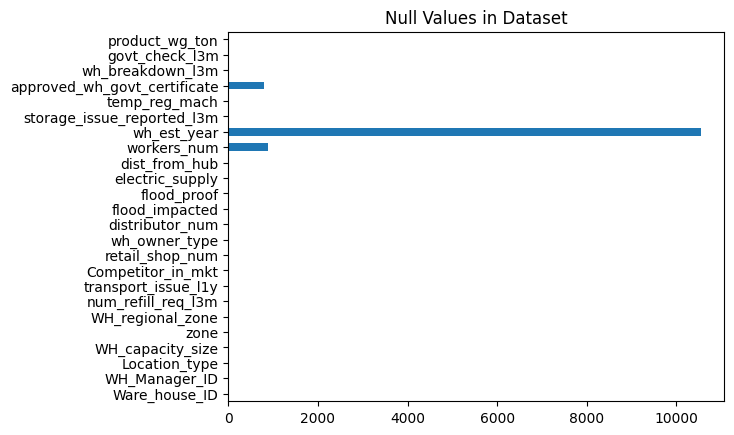

In [43]:
# Checking Null Values Present in Dataset
# The following Graph shows, we dont have any missing value present in any of the column
df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values in Dataset')
plt.show()
# First Method

<Axes: >

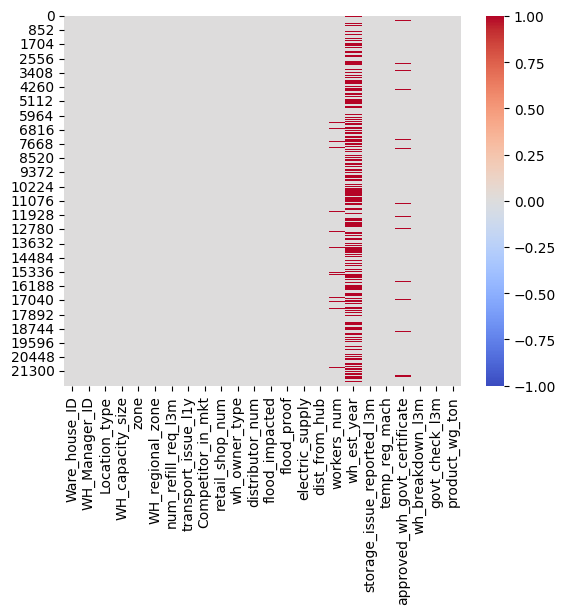

In [44]:
sns.heatmap(df.isnull(),cmap='coolwarm',vmin=-1,vmax=1,center =0)

In [45]:

# Checking Null Values Information stats
df.isnull().sum()
# df.isnull().sum() : This code will give us number of missing values in each column.
# len(df) : This code will give us Total number rows present in dataset.

,0
Ware_house_ID,0
WH_Manager_ID,0
Location_type,0
WH_capacity_size,0
zone,0
WH_regional_zone,0
num_refill_req_l3m,0
transport_issue_l1y,0
Competitor_in_mkt,0
retail_shop_num,0


In [46]:
len(df)

22150

In [47]:
print(df.isnull().sum()/len(df)*100)

Ware_house_ID                    0.000000
WH_Manager_ID                    0.000000
Location_type                    0.000000
WH_capacity_size                 0.000000
zone                             0.000000
WH_regional_zone                 0.000000
num_refill_req_l3m               0.000000
transport_issue_l1y              0.000000
Competitor_in_mkt                0.000000
retail_shop_num                  0.000000
wh_owner_type                    0.000000
distributor_num                  0.000000
flood_impacted                   0.000000
flood_proof                      0.000000
electric_supply                  0.000000
dist_from_hub                    0.000000
workers_num                      3.959368
wh_est_year                     47.607223
storage_issue_reported_l3m       0.000000
temp_reg_mach                    0.000000
approved_wh_govt_certificate     3.634312
wh_breakdown_l3m                 0.000000
govt_check_l3m                   0.000000
product_wg_ton                   0

In [48]:
# split the dataset into categorical and Numerical cols...
categorical_col = df.select_dtypes(include='object')
numerical_col = df.select_dtypes(exclude='object')
categorical_col


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,Rented,A+
22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,Rented,C
22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,Company Owned,B+
22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,Rented,B


In [49]:
numerical_col

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,29.0,NaN,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,31.0,NaN,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,37.0,NaN,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,21.0,NaN,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,25.0,2009.0,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22145,8,1,3,5030,46,0,0,1,203,28.0,2007.0,22,1,2,4,29138
22146,3,1,3,4320,60,0,0,0,170,NaN,NaN,26,0,5,9,33108
22147,7,2,2,5268,64,0,0,0,99,22.0,NaN,20,0,6,4,24072
22148,6,2,4,4378,32,0,0,0,220,17.0,NaN,13,0,3,28,15055


In [50]:
df['workers_num']

,workers_num
0,29.0
1,31.0
2,37.0
3,21.0
4,25.0
...,...
22145,28.0
22146,NaN
22147,22.0
22148,17.0


In [51]:
df['approved_wh_govt_certificate']

,approved_wh_govt_certificate
0,A
1,A
2,A
3,A+
4,C
...,...
22145,A+
22146,C
22147,B+
22148,B


In [52]:
# EDA (Exploratory Data Analysis) :
# 1. Univariate Analysis

'''
step 1 : Create a Blank List: Stats[]
step 2 : Create Dictionary using orderDict
step 3 : convert stats[] i.e. List into DataFrame

'''
from collections import OrderedDict as orderedDict

stats = []

for i in numerical_col.columns:
  numerical_stats = orderedDict({
       'Feature':i,
       'count':df[i].count(),
       'Minimum':df[i].min(),
       'Maximum':df[i].max(),
       'Mean':df[i].mean(),
       'Median':df[i].median(),
       'Minimum':df[i].min(),
       'Q1':df[i].quantile(0.25),
       'Q3':df[i].quantile(0.75),
       'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
       'Skewness':df[i].skew(),
       'Kurtosis':df[i].kurtosis(),
})
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)
report

,Feature,count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Skewness,Kurtosis
0,num_refill_req_l3m,22150,0.0,8.0,4.097020,4.0,2.00,6.0,4.00,-0.081390,-1.218193
1,transport_issue_l1y,22150,0.0,5.0,0.777201,0.0,0.00,1.0,1.00,1.605424,1.820683
2,Competitor_in_mkt,22150,0.0,12.0,3.103928,3.0,2.00,4.0,2.00,0.985102,1.798511
3,retail_shop_num,22150,1821.0,11008.0,4983.115711,4859.0,4309.25,5499.0,1189.75,0.905324,1.846915
4,distributor_num,22150,15.0,70.0,42.386998,42.0,29.00,56.0,27.00,0.017210,-1.187118
5,flood_impacted,22150,0.0,1.0,0.098691,0.0,0.00,0.0,0.00,2.691308,5.243614
6,flood_proof,22150,0.0,1.0,0.054492,0.0,0.00,0.0,0.00,3.925685,13.412215
7,electric_supply,22150,0.0,1.0,0.656072,1.0,0.00,1.0,1.00,-0.657167,-1.568273
8,dist_from_hub,22150,55.0,271.0,163.613725,164.0,109.00,218.0,109.00,-0.009042,-1.200679
9,workers_num,21273,10.0,98.0,28.936398,28.0,24.00,33.0,9.00,1.042478,3.285720


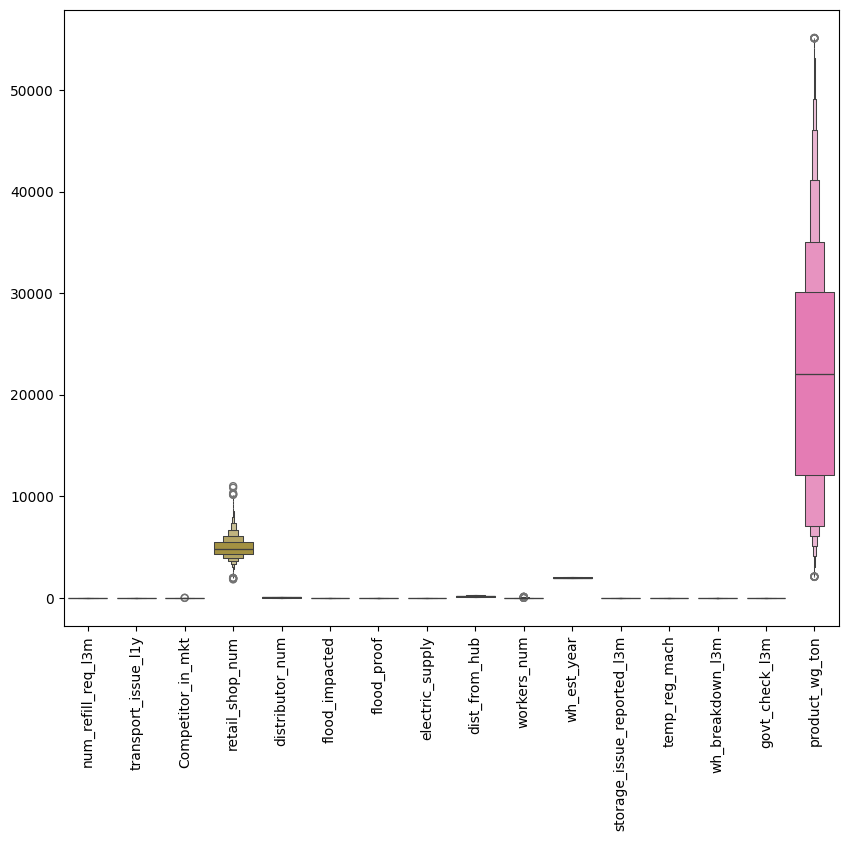

In [53]:
plt.figure(figsize = (10,8))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

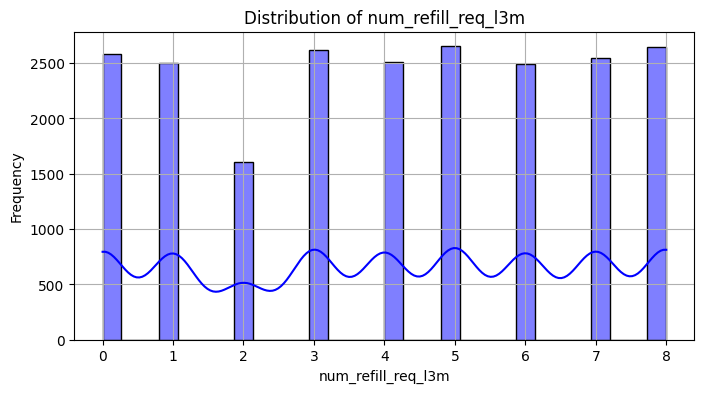

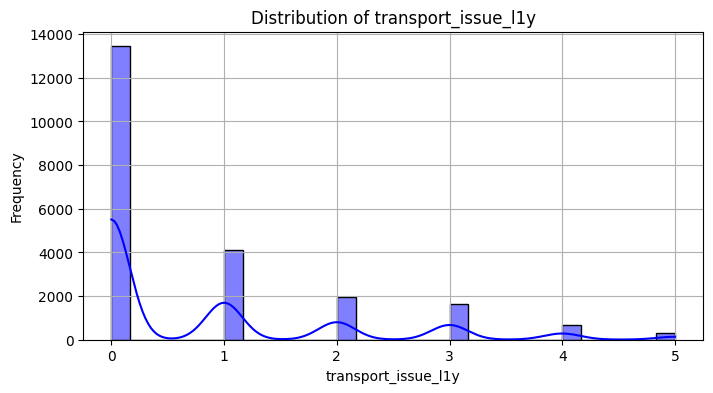

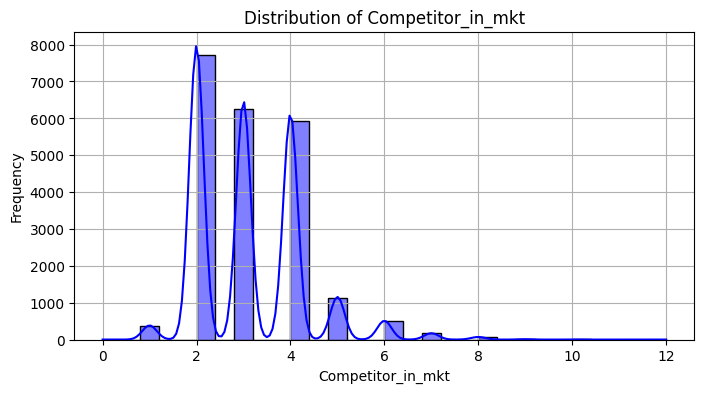

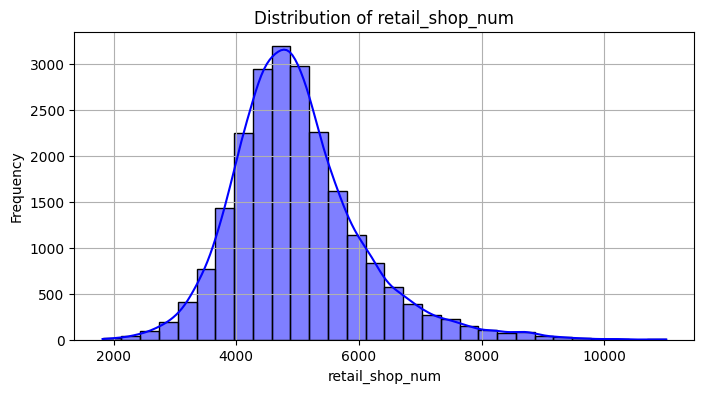

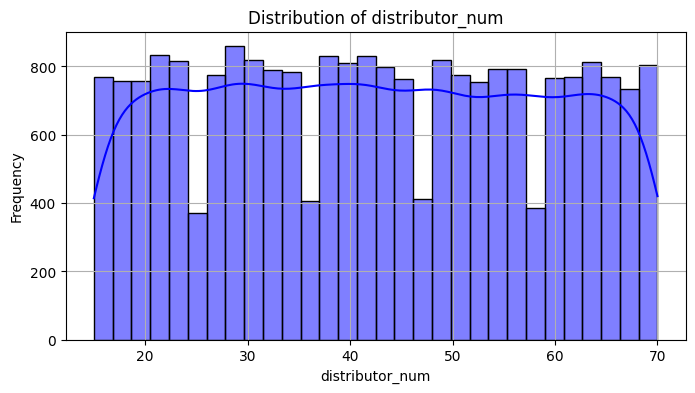

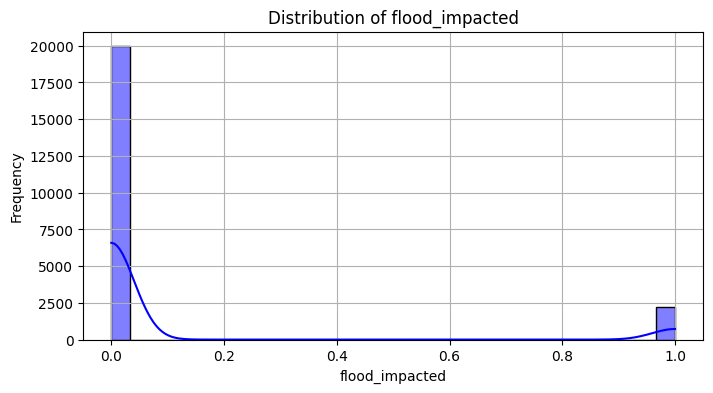

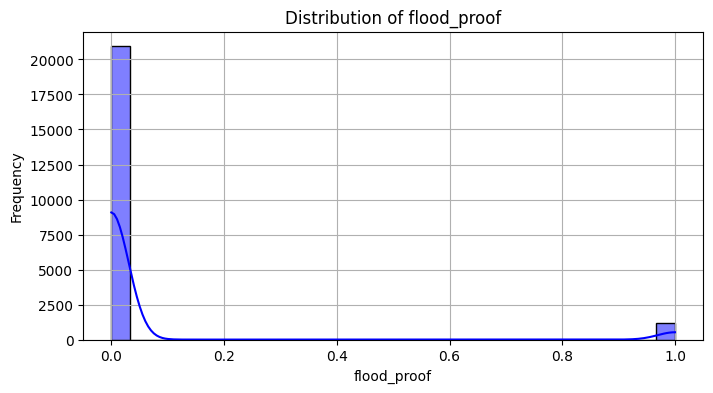

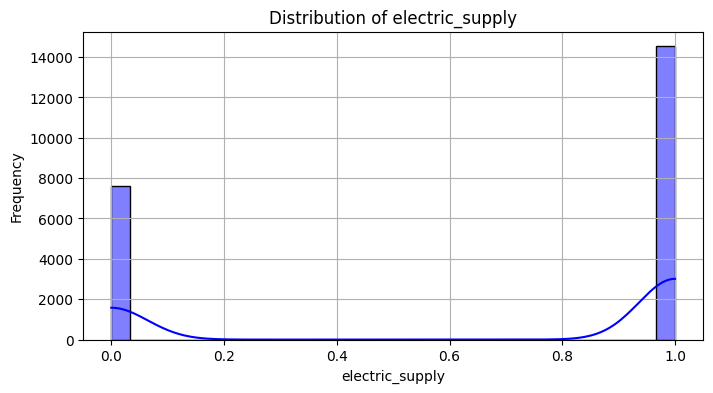

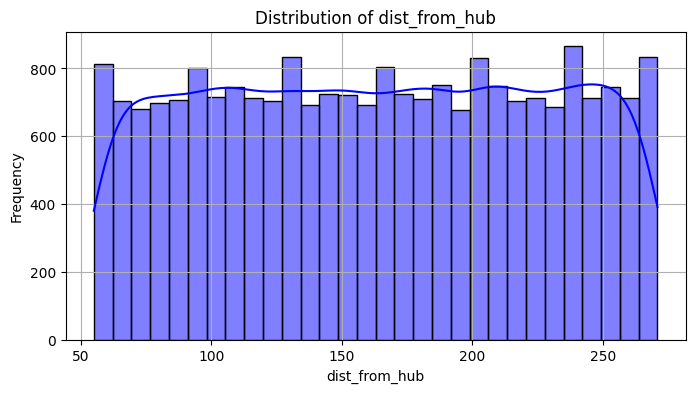

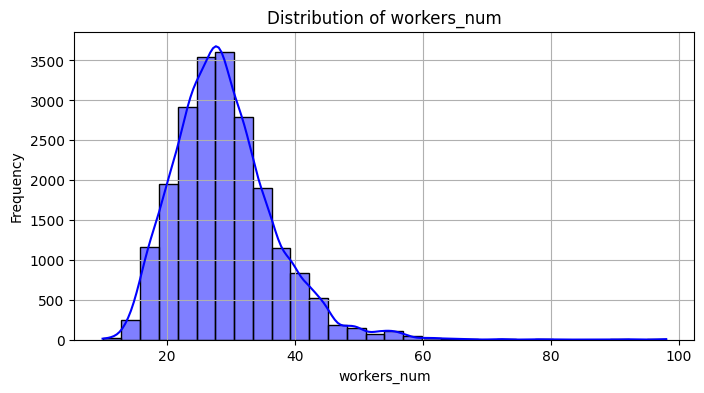

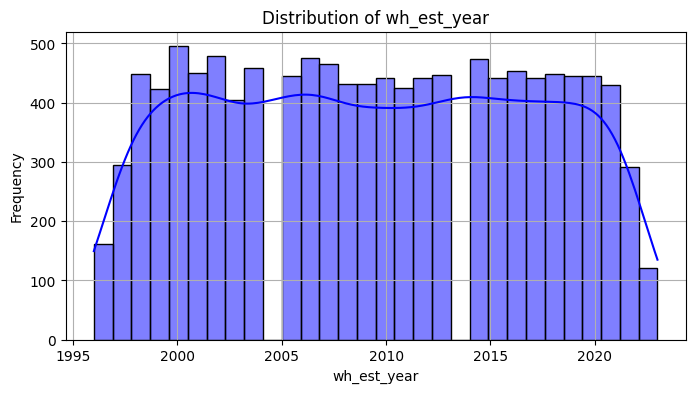

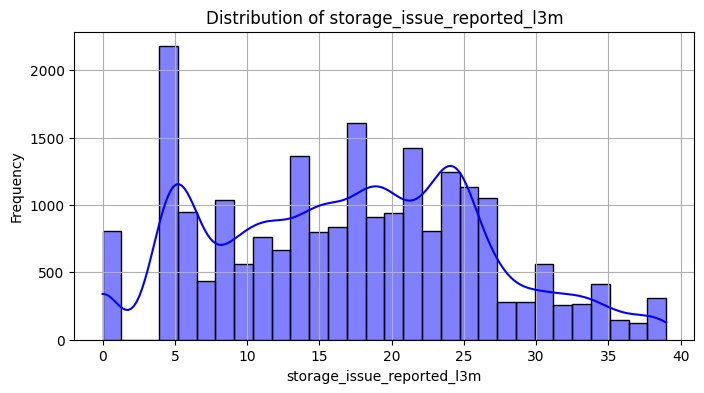

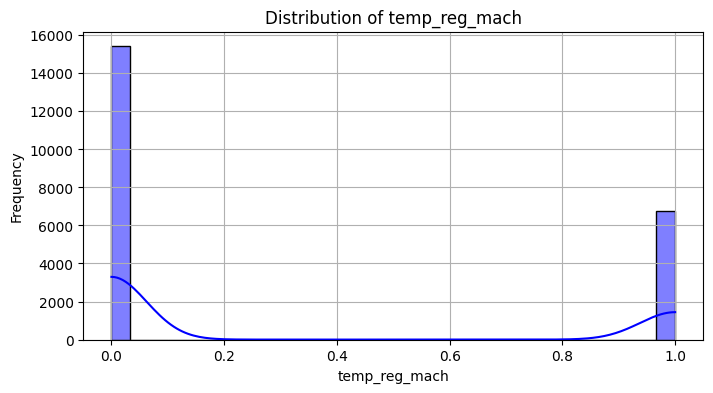

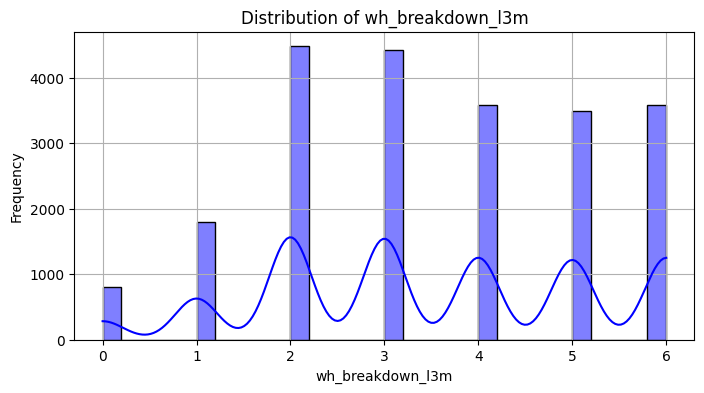

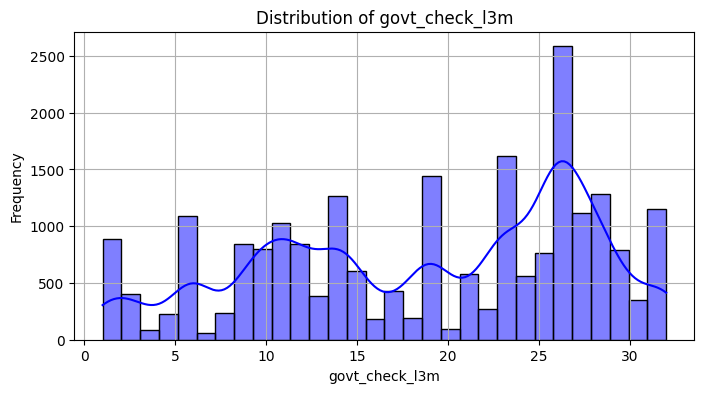

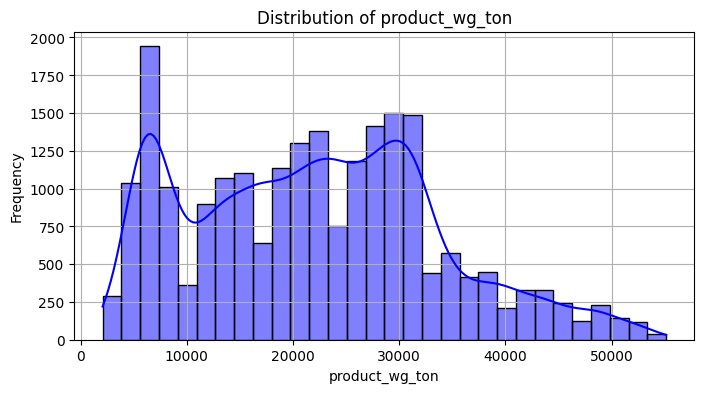

In [54]:
# Plot histograms for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


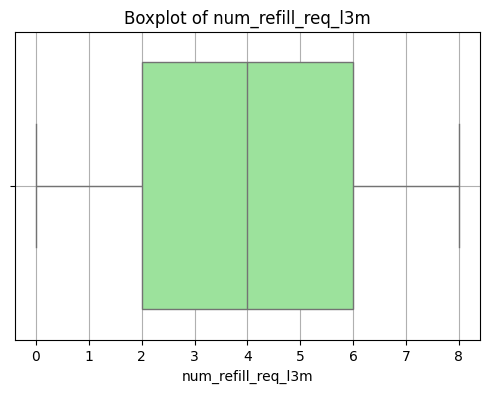

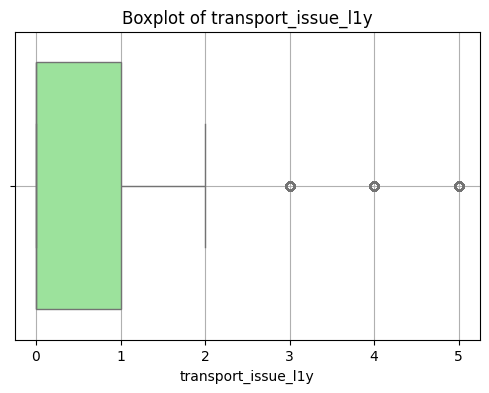

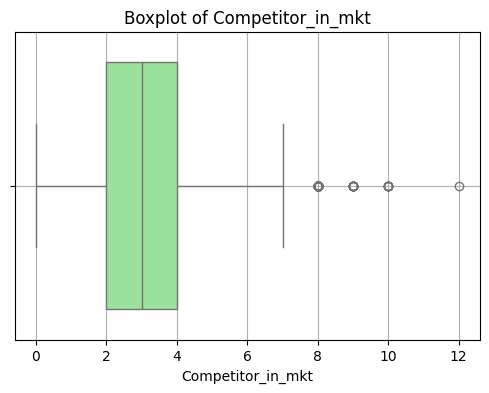

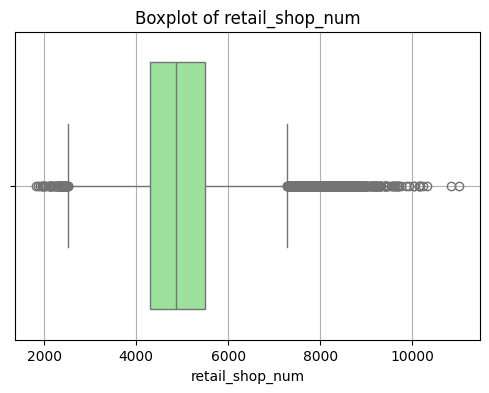

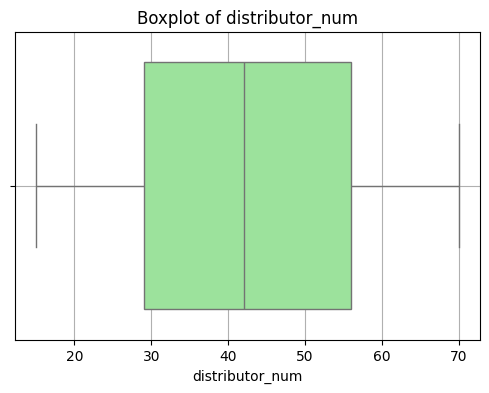

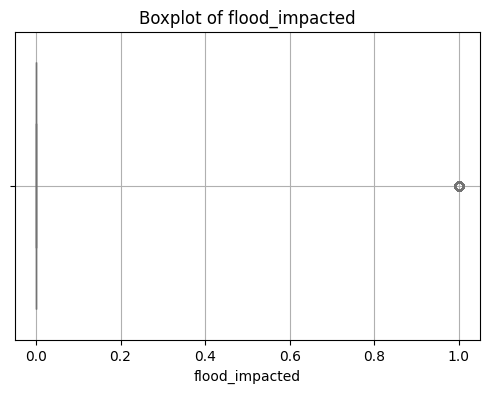

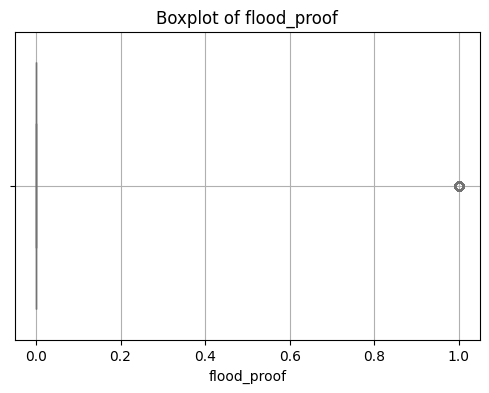

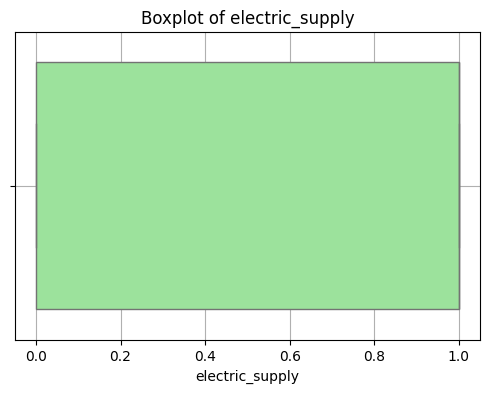

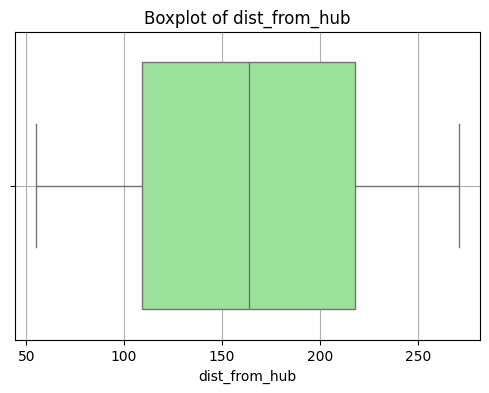

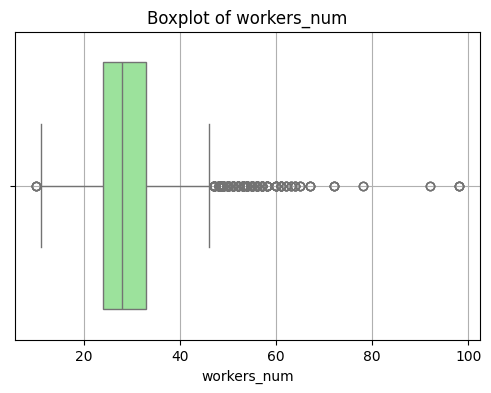

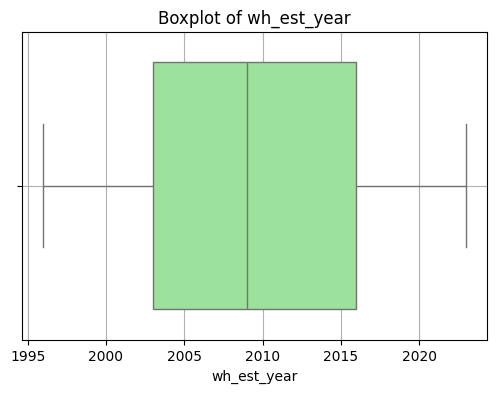

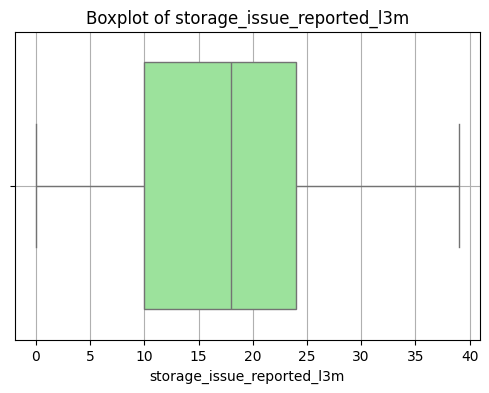

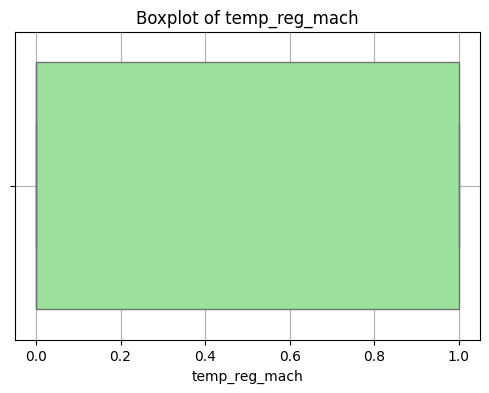

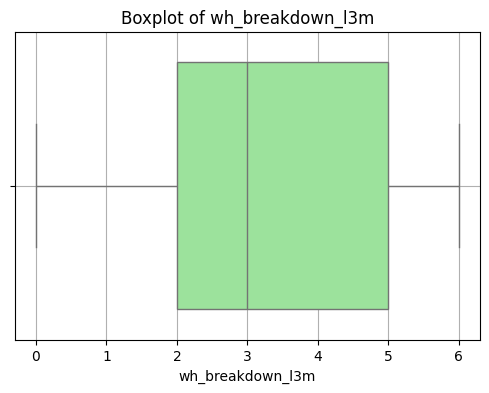

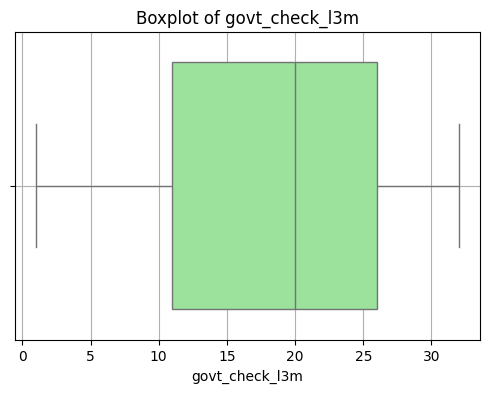

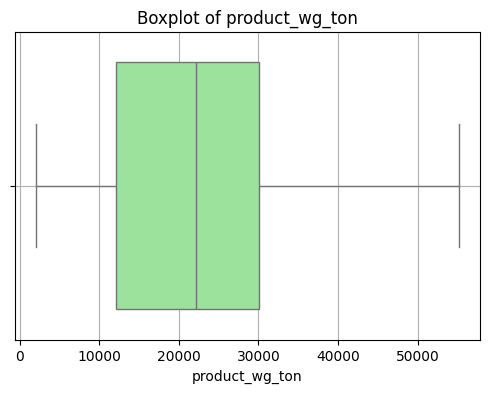

In [55]:
# Plot boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

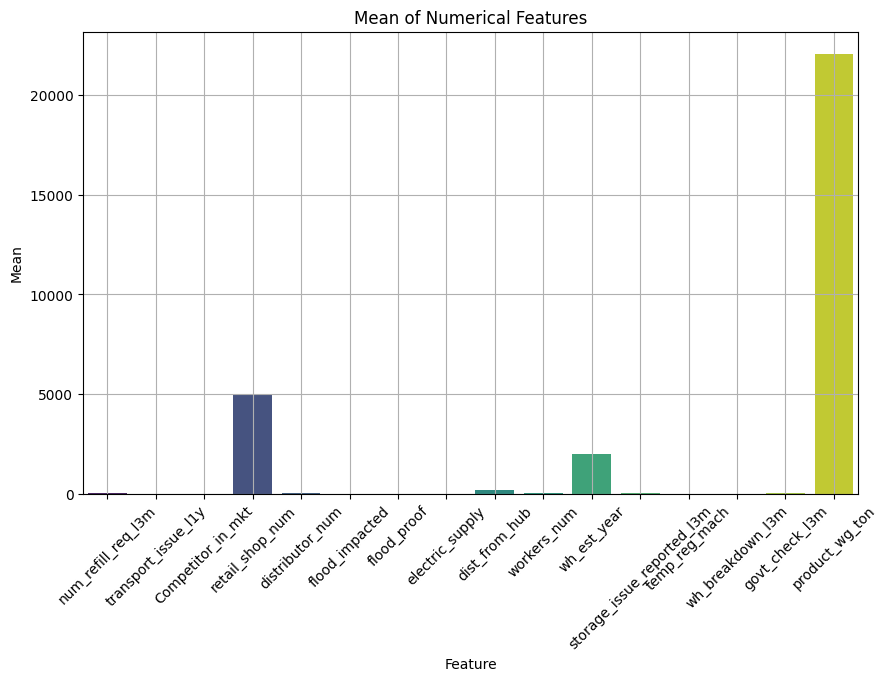

In [56]:
# Bar plot for mean values of numerical features
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mean', data=report, palette='viridis')
plt.title('Mean of Numerical Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

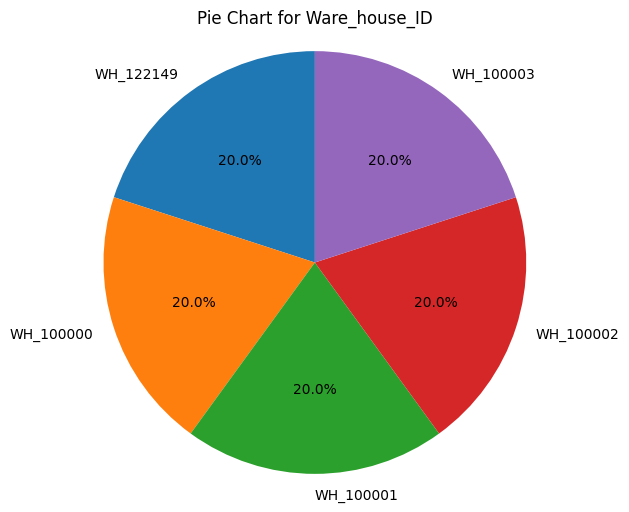

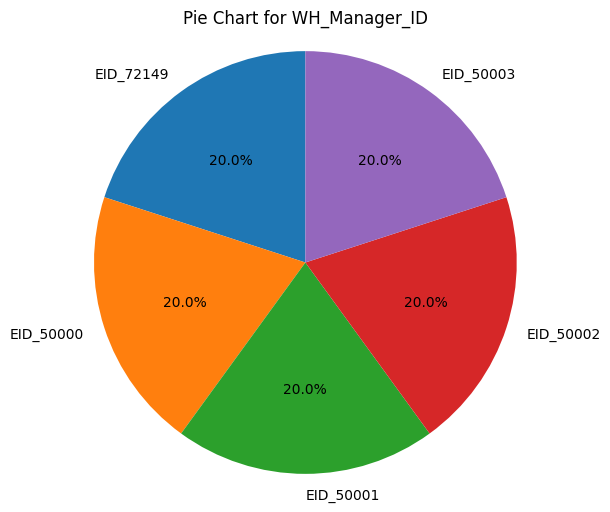

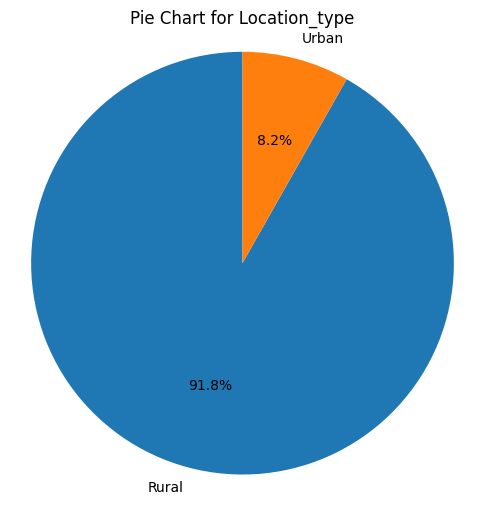

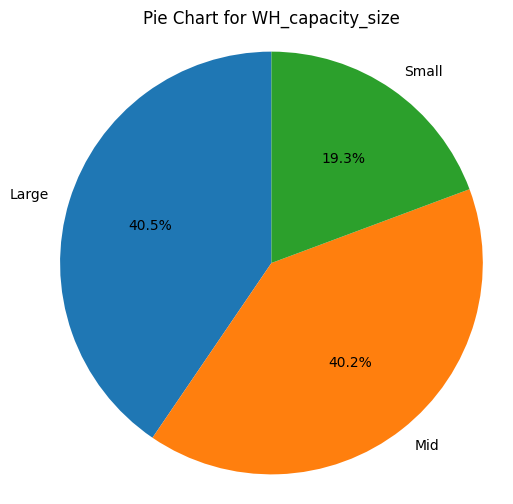

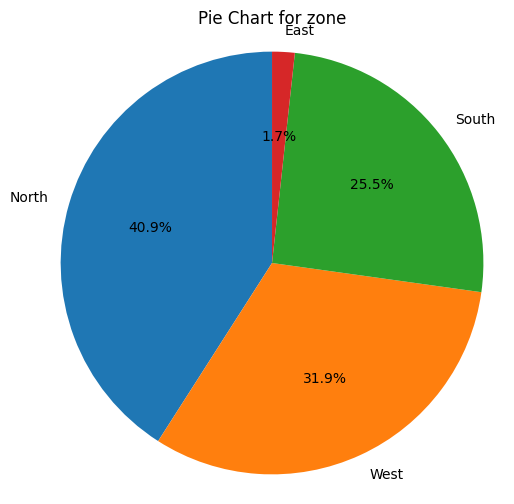

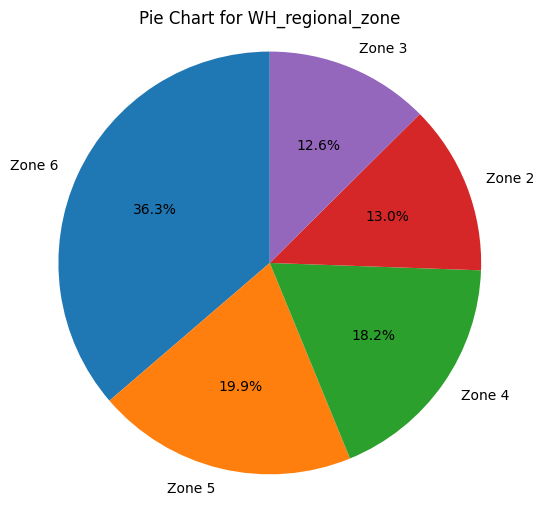

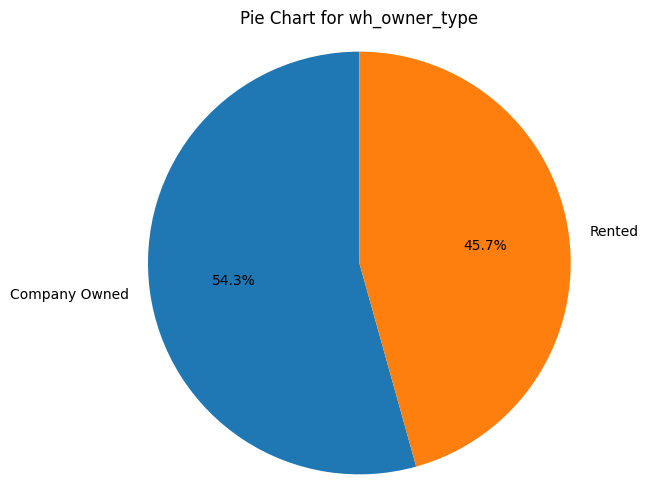

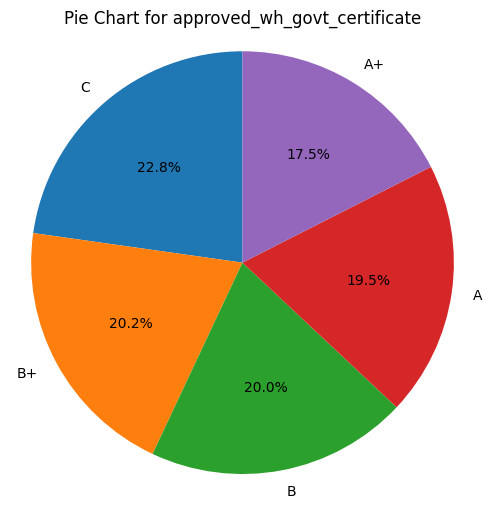

In [57]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Plot pie chart for each categorical feature (with top categories shown)
for col in categorical_cols:
    value_counts = df[col].value_counts().head(5)  # top 5 categories
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {col}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


In [58]:
# Check if 'credit_score' is a valid column
if 'credit_score' in df.columns:
    # Sort and select top 10 (non-null) values
    plt.figure(figsize=(7, 7))
    df['credit_score'].dropna().sort_values(ascending=True).head(10).plot(kind='barh', color='skyblue')
    plt.xlabel('Credit Score')
    plt.title('Top 10 Lowest Credit Scores')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'credit_score' not found in the dataset.")


Column 'credit_score' not found in the dataset.


In [63]:
# Ensure the column exists and has no missing values
if 'credit_score' in df.columns:
    # Sort credit scores in ascending order and take top 10 lowest
    top10_lowest = df['credit_score'].dropna().sort_values(ascending=True).head(10)

    # Plot horizontal bar chart
    plt.figure(figsize=(7, 7))
    top10_lowest.plot(kind='barh', color='salmon')
    plt.xlabel('Credit Score')
    plt.ylabel('Index')
    plt.title('Top 10 Lowest Credit Scores')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
else:
    print(f" 'NOT APPLICABLE', Column 'credit_score', not found in the dataset.")

 'NOT APPLICABLE', Column 'credit_score', not found in the dataset.
